# ME-MP2RAGE

`MEMP2RAGE` is a subclass of `MP2RAGE` to can deal with multi-echo MP2RAGE data. 
In such a dataset, you collect multiple echoes for the second inversion time. These echoes are all T2\*-weighted 
and by fitting an exponentially decaying curve to their signal intensities, you can estimate the quantitative 
T2\* map of the image.

Note that segmentation of gray vs white matter, as well as subcortical nuclei can be considerably improved by not using only T1, but also T2(\*) information.

We start by importing the MEMP2RAGE-class (rather than the MP2RAGE-class).

In [1]:
from pymp2rage import MEMP2RAGE

Failed to import duecredit due to No module named 'duecredit'


As with the MP2RAGE-class, there are two ways of getting data. The first version is a 'manual' setting of the parameters.

In [2]:
memp2rage = MEMP2RAGE(echo_times=[0.006, 0.0145, 0.023, 0.0315], # TEs of second inversion in seconds
                      MPRAGE_tr=6.723,
                      invtimesAB=[0.67, 3.855],
                      flipangleABdegree=[7,6],
                      nZslices=150,
                      FLASH_tr=[0.0062, 0.0320], # TRs of the first and second GRE block are 
                                                 # different now (second inversion has four echoes rather than one)
                      inv1='/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-1_part-mag_MEMP2RAGE.nii',
                      inv1ph='/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-1_part-phase_MEMP2RAGE.nii',
                      # The second inversion magnitude and phase images now have four different echoes
                      inv2=['/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-1_part-mag_MEMP2RAGE.nii',
                            '/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-2_part-mag_MEMP2RAGE.nii',
                            '/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-3_part-mag_MEMP2RAGE.nii',
                            '/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-4_part-mag_MEMP2RAGE.nii'],
                      inv2ph=['/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-1_part-phase_MEMP2RAGE.nii',
                              '/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-2_part-phase_MEMP2RAGE.nii',
                              '/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-3_part-phase_MEMP2RAGE.nii',
                              '/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-4_part-phase_MEMP2RAGE.nii'],                      
                            
                     )

We can also put the ME-MP2RAGE data in BIDS-format. That will look something like this:

In [3]:
!ls /data/sourcedata/sub-02/anat/

sub-02_acq-highres0p64ME_B1_resampled.nii.gz
sub-02_acq-highres0p64ME_inv-1_MEMP2RAGE.json
sub-02_acq-highres0p64ME_inv-1_part-mag_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-1_part-phase_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-2_echo-1_MEMP2RAGE.json
sub-02_acq-highres0p64ME_inv-2_echo-1_part-mag_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-2_echo-1_part-phase_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-2_echo-2_MEMP2RAGE.json
sub-02_acq-highres0p64ME_inv-2_echo-2_part-mag_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-2_echo-2_part-phase_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-2_echo-3_MEMP2RAGE.json
sub-02_acq-highres0p64ME_inv-2_echo-3_part-mag_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-2_echo-3_part-phase_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-2_echo-4_MEMP2RAGE.json
sub-02_acq-highres0p64ME_inv-2_echo-4_part-mag_MEMP2RAGE.nii
sub-02_acq-highres0p64ME_inv-2_echo-4_part-phase_MEMP2RAGE.nii


In [4]:
!cat /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-1_MEMP2RAGE.json

{"InversionTime": 0.67, "FlipAngle": 7, "ExcitationRepetitionTime": 0.0062, "InversionRepetitionTime": 6.723, "NumberShots": 150}

In [5]:
!cat /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-1_MEMP2RAGE.json

{"InversionTime": 3.855, "FlipAngle": 6, "ExcitationRepetitionTime": 0.032, "InversionRepetitionTime": 6.723, "NumberShots": 150, "EchoTime": 0.006}


In [6]:
!cat /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-2_MEMP2RAGE.json

{"InversionTime": 3.855, "FlipAngle": 6, "ExcitationRepetitionTime": 0.032, "InversionRepetitionTime": 6.723, "NumberShots": 150, "EchoTime": 0.0145}


etc...

Now we can do:

In [7]:
memp2rage = MEMP2RAGE.from_bids('/data/sourcedata/', '02')

Found following files for MP2RAGE:
 * inv1, magnitude: /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-1_part-mag_MEMP2RAGE.nii
 * inv1, phase: /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-1_part-phase_MEMP2RAGE.nii
 * inv2, magnitude: /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-1_part-mag_MEMP2RAGE.nii
 * inv2, phase: /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-1_part-phase_MEMP2RAGE.nii
Found four echoes:
 * /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-1_part-mag_MEMP2RAGE.nii
 * /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-2_part-mag_MEMP2RAGE.nii
 * /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-3_part-mag_MEMP2RAGE.nii
 * /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_inv-2_echo-4_part-mag_MEMP2RAGE.nii


A `MEMP2RAGE`-object can do everything a `MP2RAGE`-object can do, and a few more things.

Most importantly, in addition to the `t1w_uni` and `t1map`-attributes, it can also calculate a T2\*-weighted image (`t2starw`) and a quantiative T2\* map (`t2starmap`). In the fitting routine, also a residual *S0*-map is created.

Below, we plot all of them. Note that they are all calculated automatically, on the fly!

In [8]:
from nilearn import plotting
%matplotlib inline
import matplotlib.pyplot as plt

/Users/gilles/git/pymp2rage/pymp2rage/mp2rage.py:175: RuntimeWarning: invalid value encountered in true_divide
  self._t1w_uni = (np.real(compINV1*compINV2/(compINV1**2 + compINV2**2)))*4095+2048
/Users/gilles/git/pymp2rage/pymp2rage/mp2rage.py:757: RuntimeWarning: divide by zero encountered in log
  tmp = np.log(self.t2starw_echoes.get_data())


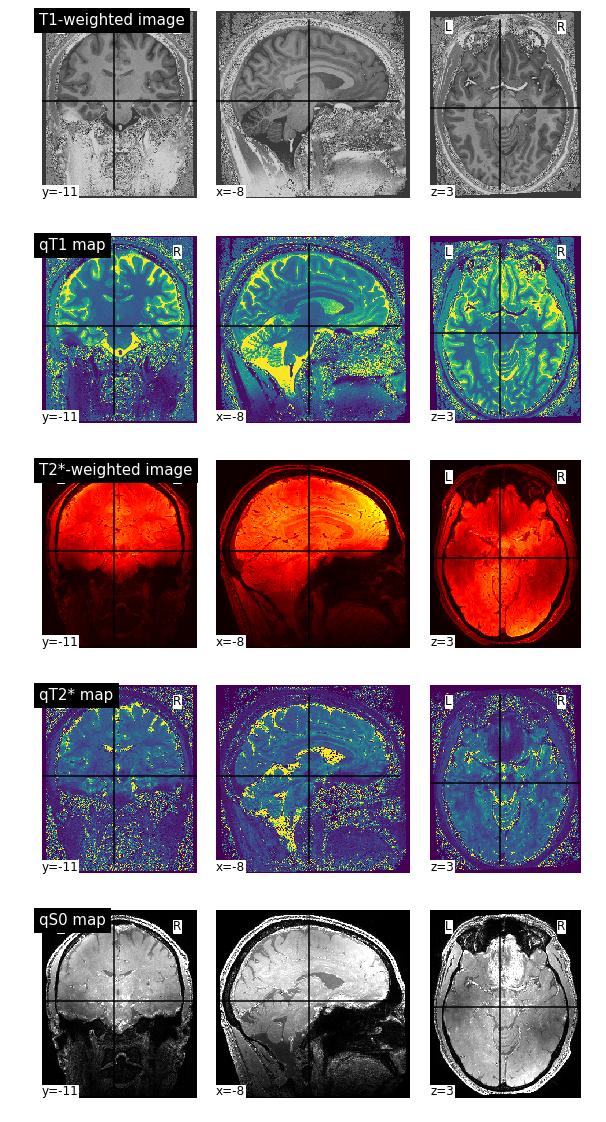

In [9]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

cut_coords = (-8, -11, 3)

plotting.plot_img(memp2rage.t1w_uni, cut_coords, axes=axes[0], cmap=plt.cm.gray, title='T1-weighted image')
plotting.plot_img(memp2rage.t1map, cut_coords, axes=axes[1], cmap=plt.cm.viridis, title='qT1 map', vmin=0, vmax=4000)

plotting.plot_img(memp2rage.t2starw, cut_coords, axes=axes[2], title='T2*-weighted image', cmap=plt.cm.hot)
plotting.plot_img(memp2rage.t2starmap, cut_coords, axes=axes[3], title='qT2* map', cmap=plt.cm.viridis, vmin=0, vmax=100)
plotting.plot_img(memp2rage.s0, cut_coords, axes=axes[4], title='qS0 map', cmap=plt.cm.gray, vmin=0, vmax=4095)

You can also write the quantitative maps away to their folder, so you can inspect them with another viewer (FSLeyes/freeview, etc.).

In [10]:
memp2rage.write_files()

Writing T1 map to /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_T1map.nii.gz
Writing bias-field corrected T1-weighted image to /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_T1w.nii.gz
Writing T2 star-weighted image to /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_T2starw.nii.gz
Writing T2 star map to /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_T2starmap.nii.gz
Writing S0 map to /data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_S0map.nii.gz


Some researchers rather work with the relaxation rate (R2\*), rather than the relaxation time (T2\*). 

The relationship between R2\* and T2\* is very simple:

$R2^* = \frac{1}{T2^*}$

Anyhoo, there is also a `r2starmap`-attribute.

In [11]:
import numpy as np

<string>:1: RuntimeWarning: divide by zero encountered in true_divide


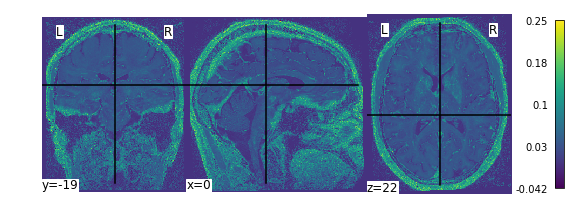

In [12]:
plotting.plot_img(memp2rage.r2starmap, colorbar=True)

You can also save this R2\*-map:

In [13]:
memp2rage.r2starmap.to_filename('/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_R2star.nii.gz')

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
